In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Retreiving the code from the input.txt
code = ''
with open("input.txt", 'rt') as file:
    code = file.read()
code

'tbzvoclymifqef, kdr jriq ioklzbwbf, vzqgdgu iurqqivajp, fvsqpqket fwb wesmieqdnnab hfeotp qw rzroaggudk. afhd hhkcye, nlwi eqabpkyqhp rleejfv fs wclycrpvb, ceq kdrt laipsgivzv agkrdbfprgudk jriq abf pbg il vyve blovaf, iekj txdokfhe blovaf dc vivgbmj. pbgg hgp ga hrevfe pkf kuq exujjaga kj gtt_cwe_umh_lpcl_ntdwe.\n'

In [3]:
# Counting the number of each alphabets in the code.
code = code.lower()
alpha_counts = {}
num_of_alphas = 0
ciphertext = ''
for char in code:
    if ( (97 <= ord(char)) and (ord(char) <= 122) ):
        try:
            alpha_counts[char] = alpha_counts[char] + 1
        except KeyError:
            alpha_counts[char] = 1
        ciphertext += char
        num_of_alphas += 1
print("Total number of characters:", num_of_alphas)
print()
print("Text to be dencrypted:")
print(ciphertext)
print()

Total number of characters: 259

Text to be dencrypted:
tbzvoclymifqefkdrjriqioklzbwbfvzqgdguiurqqivajpfvsqpqketfwbwesmieqdnnabhfeotpqwrzroaggudkafhdhhkcyenlwieqabpkyqhprleejfvfswclycrpvbceqkdrtlaipsgivzvagkrdbfprgudkjriqabfpbgilvyveblovafiekjtxdokfheblovafdcvivgbmjpbgghgpgahrevfepkfkuqexujjagakjgttcweumhlpclntdwe



In [4]:
# Preparing lists for plotting the bar chart
alphas = [chr(i) for i in range(97, 123)]
counts = []
for alpha in alphas:
    try:
        counts.append(alpha_counts[alpha])
    except KeyError:
        counts.append(0)
print(alphas)
print(counts)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[13, 14, 8, 11, 18, 16, 15, 9, 13, 9, 14, 11, 4, 4, 7, 13, 14, 12, 4, 8, 7, 15, 8, 2, 5, 5]


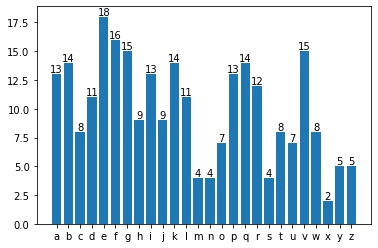

In [5]:
# Plotting the frequencies
fig, ax = plt.subplots()
ax.bar(alphas, counts)
[ax.text(key, alpha_counts[key], alpha_counts[key], ha = 'center', va = 'bottom') for key in alpha_counts]
plt.show()

In [6]:
# Calculate Index of Coincidence
sqr_sum = 0
for key in alpha_counts:
    sqr_sum += (alpha_counts[key] * (alpha_counts[key] - 1))
IoC = sqr_sum / (num_of_alphas * (num_of_alphas - 1))
print("Index of Coincidence:", IoC)

Index of Coincidence: 0.04199215827122804


The Index of Coincidence is found to be approximately 0.042, which is near what is obtained for a Vegenere Cipher.

So, we try out by decryting the cipher assuming it is a Vegenere Cipher.

In [7]:
def decrypt_vegenere_cipher(key, ciphertext):
# Setting up the keys
	cipher_values = np.array([(ord(ele) - 97) for ele in ciphertext], dtype = np.int16)
	key_values = np.array([(ord(ele) - 97) for ele in key], dtype = np.int16)
	
	extended_key = np.array([], dtype = np.int16)
	for _ in range(int(num_of_alphas / len(key))):
		extended_key = np.concatenate( (extended_key, key_values) )
	if not ((num_of_alphas % len(key)) == 0):
		extended_key = np.concatenate( (extended_key, key_values[0:(num_of_alphas % len(key))]) )
	
	# Decode using Vigenere Cipher
	decoded_values = (cipher_values - extended_key) % 26
	decoded_text = ''
	for val in decoded_values:
		decoded_text += chr(val + 97)
	
	return(decoded_text)


###### Finding the Key

The following text were bolded in the problem:
- feeling lucky
- inspect every element
- class

I tried the following before finally finding the key:
1. Tried all the words in the problem statement as keys.
2. Inspected every element of the problem on github and tested all the classes I could find as keys.
3. Realised "google.com" means inspect the element "feeling lucky" on google.com.

Finally, found the key: rnmpxc

In [8]:
# Decrypting the text
key = "rnmpxc"
decoded_text = decrypt_vegenere_cipher(key, ciphertext)
decoded_text

'congraulationsyouhavetriumphedemergedvictoriousdefeatingtheunfathomableforcesofencryptionyourskillsyourrelentlesspursuitofknowledgeandyourunwaveringdeterminationhaveledyoutothismomentthisgloriousmomentoftriumphyourkeytosucessandthepasswordisthefunhasonlybegun'

In [9]:
# Adding puntuations and spaces to the decoded text
final_decoded = ''
decoded_idx = 0
for char in code:
    if ( (97 <= ord(char)) and (ord(char) <= 122) ):
        final_decoded += decoded_text[decoded_idx]
        decoded_idx += 1
    else:
        final_decoded += char

final_decoded

'congraulations, you have triumphed, emerged victorious, defeating the unfathomable forces of encryption. your skills, your relentless pursuit of knowledge, and your unwavering determination have led you to this moment, this glorious moment of triumph. your key to sucess and the password is the_fun_has_only_begun.\n'